In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
df = pd.read_csv('advertising.csv')

In [222]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [223]:
m = len(df.axes[0]) # 198
n = len(df.axes[1]) # 4     (x_0 = 1, x_1, x_2, x_3)

# Converting dataframe to numpy array
x_0 = np.ones([m, 1])
features = df.drop('Sales', axis=1)
features_array = features.to_numpy()

x = np.concatenate((x_0, features_array), axis = 1)
y = (df['Sales']).to_numpy()
theta = np.zeros((n, 1))
alpha = 0.000065

In [224]:
# Feature Scaling
def feature_scaling(x):
    x_max = x.max(0)        #[  1.  296.4  49.6 114. ]
    x = (x / x_max)
    return x

In [225]:
def hypothesis(theta, x):    
    return np.dot(np.transpose(theta), x)

In [226]:
def cost(theta, x, y, m):
    cur_cost = 0
    for i in range(m):
        cur_x = x[i]
        hypo = hypothesis(theta, cur_x)
        diff = hypo - y[i]
        cur_cost += (diff * diff)
    return cur_cost / (2 * m)
        

In [227]:
def gradient_descent(theta, x, y, n, m, alpha):

    costs = []
    thetas = [theta]

    for i in range(1000):
        new_theta = np.zeros((n, 1))
        
        for j in range(n):
            cur_sum = 0
            
            for k in range(m):
                dif = hypothesis(theta, x[k]) - y[k]
                cur_sum += dif * x[k][j]
                
            cur_sum = alpha * cur_sum / m
            new_theta[j] = theta[j] - cur_sum
        
        theta = new_theta
        thetas.append(theta)
        cur_cost = cost(theta, x, y, m)
        costs.append(cur_cost)

    return [theta, thetas, costs]



In [228]:
[computed_theta, thetas, costs] = gradient_descent(theta, x, y, n, m, 0.000066)

Text(0, 0.5, 'Iterations')

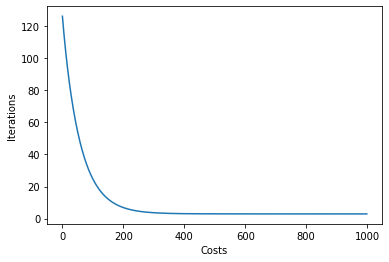

In [229]:
plt.plot(costs)
plt.xlabel("Costs")
plt.ylabel("Iterations")

In [230]:
# Testing Data1: 232.1,8.6,8.7,18.4
# Testing Data2: 11.7,36.9,45.2,7.3
test_x_1 = [1,232.1,8.6,8.7]
test_x_2 = [1,11.7,36.9,45.2]
print("Model's ans: ", hypothesis(computed_theta, test_x_1), " Correct ans: 18.4")
print("Model's ans: ", hypothesis(computed_theta, test_x_2), " Correct ans: 7.3")

Model's ans:  [17.16955017]  Correct ans: 18.4
Model's ans:  [8.01770994]  Correct ans: 7.3
